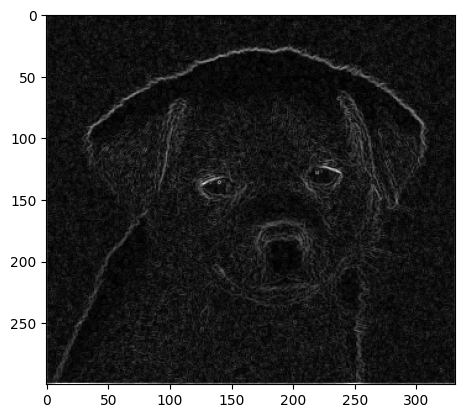

In [41]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2
from math import sqrt



def __detect_edges(image, vertical_grad_filter=None, horizontal_grad_filter=None):
   
    # convert to grayscale image
    image = np.dot(image, [1, 1, 1])//3

    # normalize the image
    image = image/255

    # kernel width initialization
    kernel_width = vertical_grad_filter.shape[0]//2

    # initialize the gradient image
    gradient = np.zeros(image.shape)

    # pad the image
    image = np.pad(image, kernel_width, 'constant')

    for i in range(kernel_width, image.shape[0] - kernel_width):
        for j in range(kernel_width, image.shape[1] - kernel_width):

            # obtain the horizontal gradients
            x = image[i - kernel_width: i + kernel_width + 1, j - kernel_width: j + kernel_width + 1]
            x = x.flatten() * vertical_grad_filter.flatten()
            sum_x = x.sum()

            # obtain the vertical gradients
            y = image[i - kernel_width: i + kernel_width + 1, j - kernel_width: j + kernel_width + 1]
            y = y.flatten() * horizontal_grad_filter.flatten()
            sum_y = y.sum()

            # calculate the gradient
            gradient[i - kernel_width][j - kernel_width] = sqrt(sum_x**2 + sum_y**2)
    
    return gradient

img=cv2.imread('../images/02.jpeg')
vertical_grad_filter = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
horizontal_grad_filter = np.array([[-1,- 2, -1],[0, 0, 0],[1, 2, 1]])
imgg=__detect_edges(img, vertical_grad_filter, horizontal_grad_filter)
plt.imshow(imgg,cmap='gray')



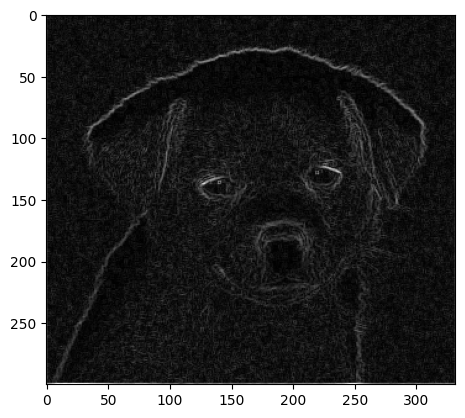

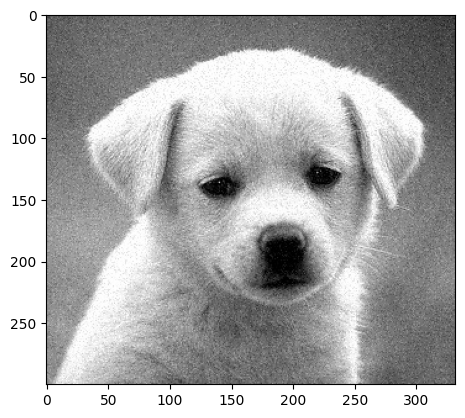

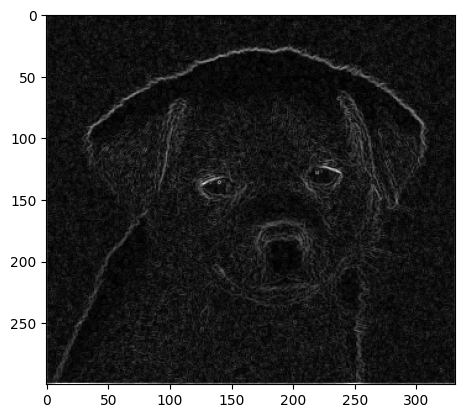

In [9]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2
from math import sqrt
import time

class sobel_edge_detector:
    def __init__(self, path= None, img= None):
        if path != None:
            self.image = cv2.imread(path)
        else:
            self.image = img
        
        

    def cvt2gray(self):
        
        print(self.image)

    def detect_edges(self):
        self.orig_img = self.image
        self.vertical_grad_filter = np.array([[1, 0, -1],[2, 0, -2],[1, 0, -1]])
        self.horizontal_grad_filter = np.array([[1, 2, 1],[0, 0, 0],[-1, -2, -1]])
        self.image = np.dot(self.image, [1, 1, 1])//3
        self.image = self.image/255
        kernel_width = self.vertical_grad_filter.shape[0]//2
        grad_ = np.zeros(self.image.shape)

        self.image = np.pad(self.image, pad_width= ([kernel_width, ], [kernel_width, ]), 
        mode= 'constant', constant_values= (0, 0))
        for i in range(kernel_width, self.image.shape[0] - kernel_width):
            for j in range(kernel_width, self.image.shape[1] - kernel_width):
                x = self.image[i - kernel_width: i + kernel_width + 1, j - kernel_width: j + kernel_width + 1]
                x = x.flatten() * self.vertical_grad_filter.flatten()
                sum_x = x.sum()

                y = self.image[i - kernel_width: i + kernel_width + 1, j - kernel_width: j + kernel_width + 1]
                y = y.flatten() * self.horizontal_grad_filter.flatten()
                sum_y = y.sum()
        
                grad_[i - kernel_width][j - kernel_width] = sqrt(sum_x**2 + sum_y**2)
        self.image = grad_
        return self.image
        # loc_time = time.localtime(time.time())
        # m = str(loc_time.tm_year) + str(loc_time.tm_mon) + str(loc_time.tm_mday) + str(loc_time.tm_hour) + str(loc_time.tm_min) + str(loc_time.tm_sec)
        # img_save_name = 'sobel_edge_det_' + m + ".jpg"
        # plt.imsave(img_save_name, self.image)

    def show_image(self, orig = 0):
        if orig == 1:
            plt.imshow(self.orig_img)
            plt.show()
        if orig == 0:
            # for i in range(len(self.image)):
            #     for j in range(len(self.image[0])):
            #         self.image[i][j] = 1 - self.image[i][j] 
            plt.imshow(self.image, cmap= 'gray')
            plt.show()


if __name__ == "__main__":
    img = sobel_edge_detector("../images/02.jpeg")
    
    img.detect_edges()
    img.show_image(1)
    img.show_image()
    


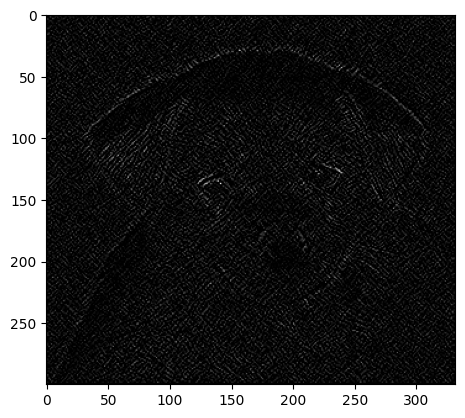

In [19]:
img=cv2.imread('../images/02.jpeg')
imgg=cv2.Sobel(img,ksize=3,ddepth=-11,dx=1,dy=1)
plt.imshow(imgg,cmap='gray')

In [ ]:
# Define both gradients as 2D arrays
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

# Convert RGB image to grayscale
img = cv2.imread('../images/02.jpeg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Pad image with zeros to retain original size
padded_img = np.pad(gray,(1,),mode='constant',constant_values=0)

# Initialize output arrays for x and y gradients
grad_x = np.zeros_like(gray)
grad_y = np.zeros_like(gray)

# Convolve kernels with image
for i in range(1,padded_img.shape[0]-1):
    for j in range(1,padded_img.shape[1]-1):
        grad_x[i-1,j-1] = np.sum(padded_img[i-1:i+2,j-1:j+2]*sobel_x)
        grad_y[i-1,j-1] = np.sum(padded_img[i-1:i+2,j-1:j+2]*sobel_y)

# Take vectorial sum of gradients
grad_mag = np.sqrt(grad_x**2 + grad_y**2)

# Normalize gradient magnitude to range [0,255]
grad_mag = (grad_mag/np.max(grad_mag))*255

# Convert gradient magnitude to uint8 type
grad_mag = grad_mag.astype(np.uint8)

# Display original image and edge image
plt.imshow(img,cmap='gray')
plt.imshow(grad_mag,cmap='gray')


In [43]:
def __detect_edges(image, vertical_grad_filter=None, horizontal_grad_filter=None):
            # convert to grayscale image
            image = np.dot(image, [1, 1, 1])//3

            # normalize the image
            image = image/255

            # kernel width initialization
            kernel_width = vertical_grad_filter.shape[0]//2

            # initialize the gradient image
            gradient = np.zeros(image.shape)

            # pad the image
            image = np.pad(image, kernel_width, 'constant')

            for i in range(kernel_width, image.shape[0] - kernel_width):
                for j in range(kernel_width, image.shape[1] - kernel_width):

                    # obtain the horizontal gradients
                    x = image[i - kernel_width: i + kernel_width + 1, j - kernel_width: j + kernel_width + 1]
                    x = x.flatten() * vertical_grad_filter.flatten()
                    sum_x = x.sum()

                    # obtain the vertical gradients
                    y = image[i - kernel_width: i + kernel_width + 1, j - kernel_width: j + kernel_width + 1]
                    y = y.flatten() * horizontal_grad_filter.flatten()
                    sum_y = y.sum()

                    # calculate the gradient
                    gradient[i - kernel_width][j - kernel_width] = sqrt(sum_x**2 + sum_y**2)
            
            return gradient
        
def sobel_edge_detector(image):
    vertical_grad_filter = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
    horizontal_grad_filter = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    return __detect_edges(image, vertical_grad_filter, horizontal_grad_filter)
 
def roberts_edge_detector(image):
    vertical_grad_filter = np.array(
        [[1, 0], [0, -1]])
    horizontal_grad_filter = np.array(
        [[0, 1], [-1, 0]])
    return __detect_edges(image, vertical_grad_filter, horizontal_grad_filter)

def prewitt_edge_detector(image):
    vertical_grad_filter = np.array(
        [[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
    horizontal_grad_filter = np.array(
        [[1, 0, -1], [1, 0, -1], [1, 0, -1]])
    return __detect_edges(image, vertical_grad_filter, horizontal_grad_filter)




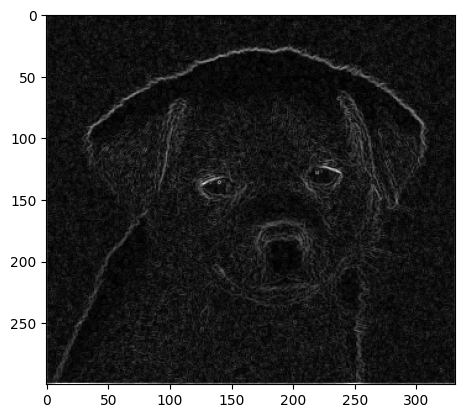

In [44]:
img=cv2.imread('../images/02.jpeg')
imgg=sobel_edge_detector(img)
plt.imshow(imgg,cmap='gray')

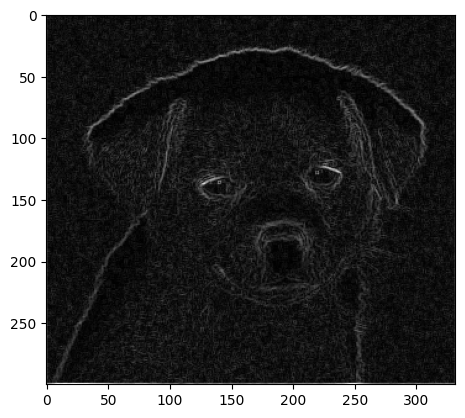

In [46]:
img=cv2.imread('../images/02.jpeg')

imgg=prewitt_edge_detector(img)
plt.imshow(imgg,cmap='gray')